In [1]:
import nltk
#샘플 말뭉치 다운로드
nltk.download("book",quiet=True)

True

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
#저작권이 만료된 문학작품이 포함된 말뭉치 로딩
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
#샘플 텍스트 파일 불러오기
emma_raw=nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [15]:
#문장 단위로 토크나이징
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3:5]) # 3~5번째 문장

["Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.']


In [16]:
#단어 단위로 토크나이징
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [17]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1=PorterStemmer()
st2=LancasterStemmer()

words=["fly","flies","flying","flew","flown"]
#어간 추출(어미를 제거하는 작업)
print( [st1.stem(w) for w in words ])
print( [st2.stem(w) for w in words ])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [18]:
#원형복원
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
words=["fly","flies","flying","flew","flown"]
[lm.lemmatize(w,pos="v") for w in words] #동사원형을 복원

['fly', 'fly', 'fly', 'fly', 'fly']

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


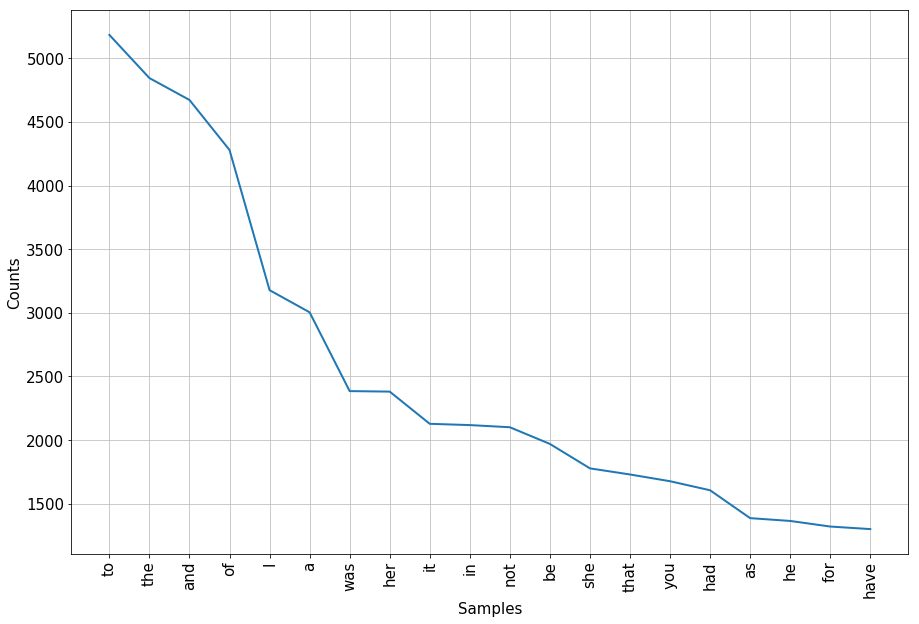

In [26]:
%matplotlib inline
from nltk import Text
import matplotlib.pyplot as plt
#정규표현식을 이용한 어근추출기
from nltk.tokenize import RegexpTokenizer 

#print(retokenize.tokenize(emma_raw))
retokenize=RegexpTokenizer("[\w]+") #특수문자 제거
retokenize.tokenize(emma_raw[50:100]) #토크나이징
text=Text(retokenize.tokenize(emma_raw))
print(text)
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["font.size"]=15
text.plot(20)
plt.show()

In [21]:
#단어가 사용된 위치를 표시
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [27]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [36]:
#불용어 제거
from nltk import FreqDist
from nltk.tag import pos_tag
#불용어 리스트
stopwords=["Mr.","Mrs.","Miss","Mr","Mrs","Dear"]
emma_tokens=pos_tag(retokenize.tokenize(emma_raw)) #품사 태깅
#고유명사이고 불용어가 아닌 단어들
names_list=[ t[0] for t in emma_tokens if t[1] == "NNP" 
            and t[0] not in stopwords ]
print(names_list)
fd_names=FreqDist(names_list)

['Jane', 'Austen', 'VOLUME', 'Emma', 'Woodhouse', 'Sixteen', 'Taylor', 'Woodhouse', 'Emma', 'Between', 'Taylor', 'Emma', 'Taylor', 'Emma', 'Sorrow', 'Taylor', 'Taylor', 'Emma', 'Weston', 'Taylor', 'A', 'Isabella', 'How', 'Emma', 'Weston', 'Taylor', 'Woodhouse', 'Her', 'London', 'October', 'November', 'Hartfield', 'Christmas', 'Isabella', 'Highbury', 'Hartfield', 'Taylor', 'Emma', 'Matrimony', 'Taylor', 'Taylor', 'Hartfield', 'Emma', 'Poor', 'Taylor', 'Weston', 'Weston', 'Taylor', 'A', 'How', 'Randalls', 'No', 'James', 'Weston', 'Weston', 'James', 'Randalls', 'Hannah', 'Nobody', 'Hannah', 'James', 'James', 'Whenever', 'Taylor', 'Whenever', 'James', 'Emma', 'Knightley', 'Isabella', 'Highbury', 'London', 'Hartfield', 'Brunswick', 'Square', 'Woodhouse', 'Knightley', 'Isabella', 'Woodhouse', 'Knightley', 'Dirty', 'Look', 'Well', 'Who', 'Ah', 'Taylor', 'Tis', 'Poor', 'Woodhouse', 'Taylor', 'Emma', 'Emma', 'Woodhouse', 'My', '_you_', 'Knightley', '_you_', 'Oh', 'Knightley', 'Knightley', 'Emma

In [37]:
#전체단어수, 키워드의 출현횟수, 출현비율
fd_names.N(), fd_names["Donwell"], fd_names.freq("Donwell")

(7863, 49, 0.006231718173725041)

In [38]:
fd_names.most_common(5) #가장 출현 빈도가 높은 단어 5개

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

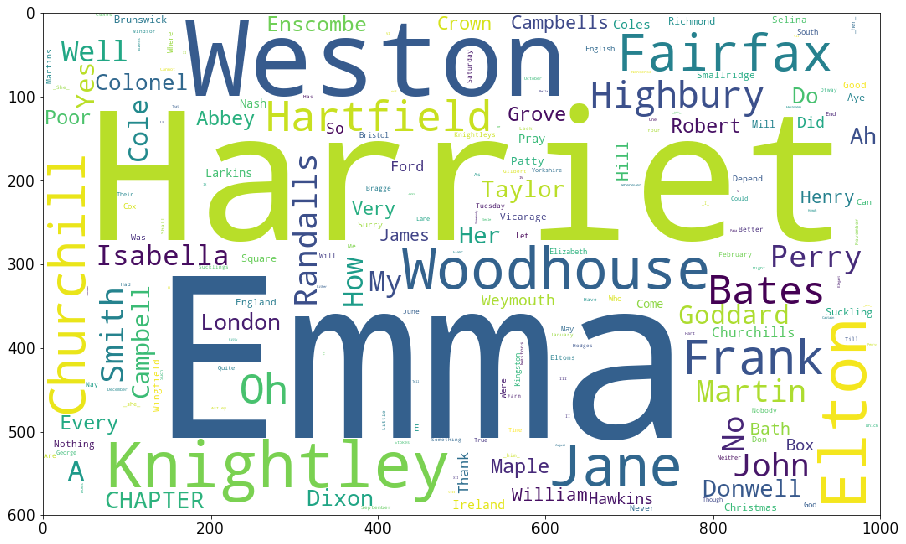

In [40]:
#pip install wordcloud
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=600,background_color="white",
            random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()